# Budget64

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import underscore as __
import PlotlyX as px

reload(__)
reload(px)

plt.style.use('seaborn')
from numpy.core.defchararray import add as npStrAdd
tdata = pd.read_pickle('Transaction.pkl')
bdata = pd.read_pickle('Budget.pkl')
months = np.array(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

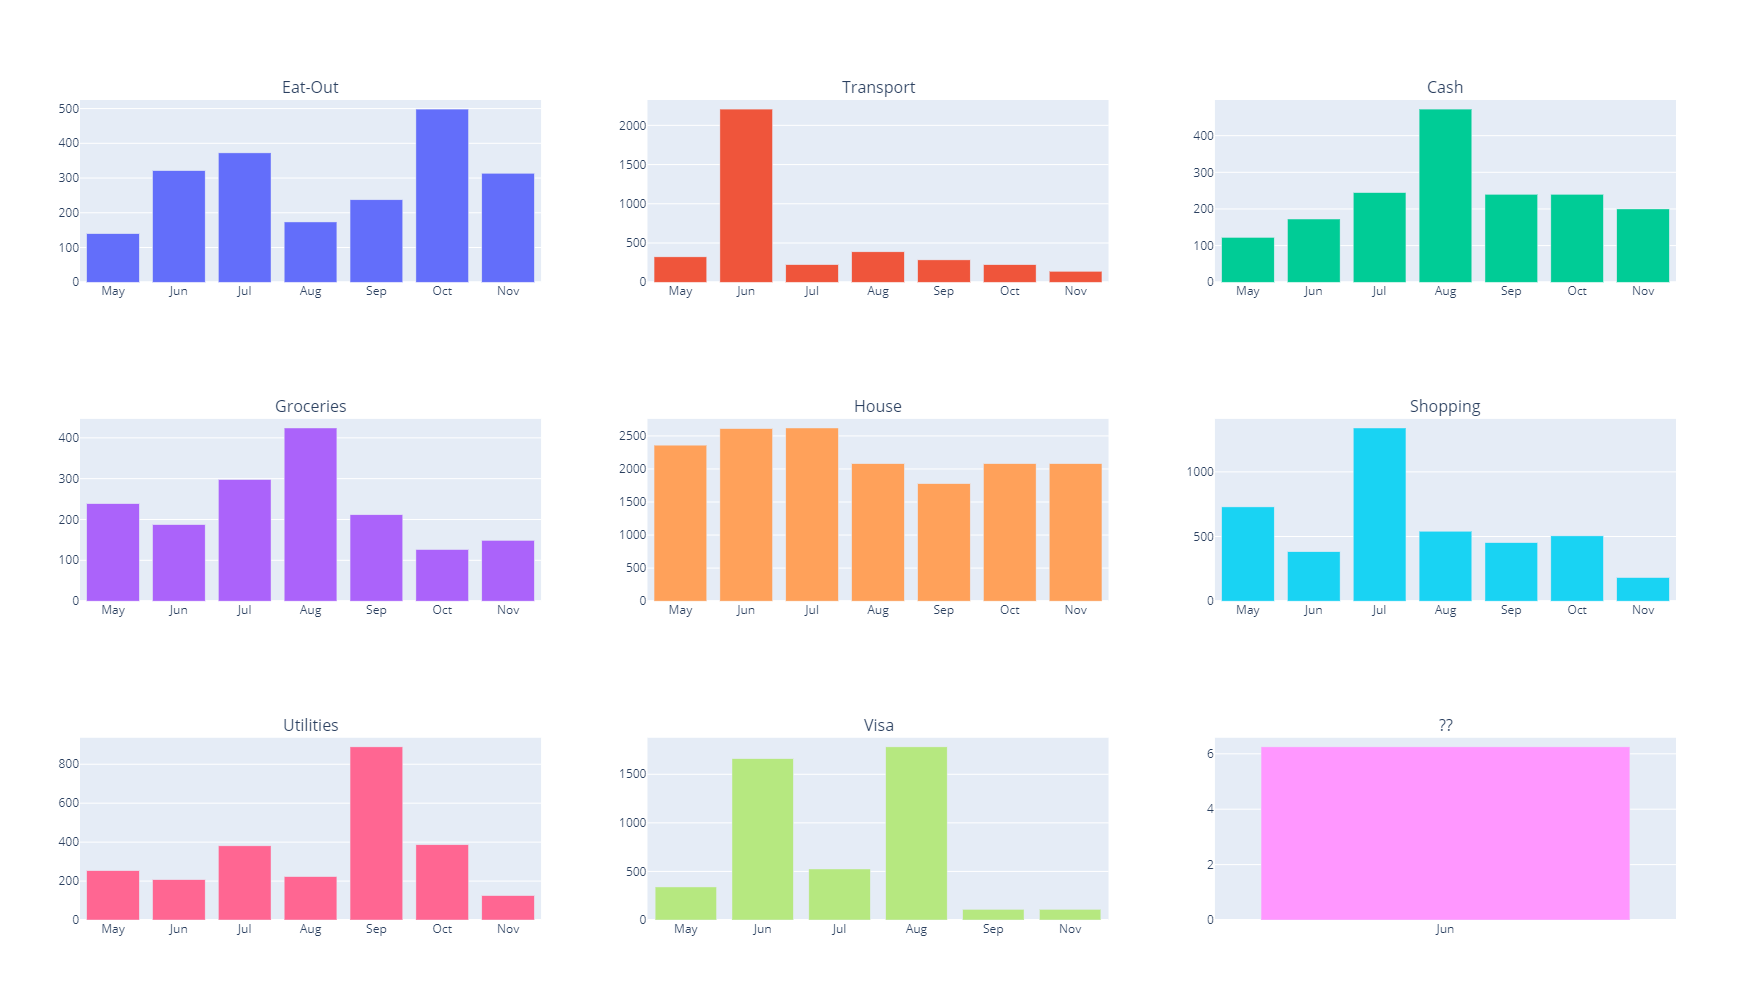

In [26]:
cats = tdata['Category'].unique().tolist()
year = 2019

fig, ax = px.subplots(3, 3, subplot_titles=cats, height=1000)

for i, cat in enumerate(cats):
    mask = (tdata['Date'].dt.year == year) & (tdata['Category'] == cat)
    df = tdata[mask]
    grouped = df.groupby(by=df['Date'].dt.month)['Amt'].sum()

    labels = months[grouped.index]
    values = grouped.values

    ax[i // 3][i % 3].bar(values=values, labels=labels)

fig.show()

In [29]:
cat = 'Eat-Out'
year = 2019

mask = (tdata['Date'].dt.year == year) & (tdata['Category'] == cat)
df = tdata[mask]
grouped = df.groupby(by=df['Date'].dt.month)['Amt'].sum()

labels = months[grouped.index]
values = grouped.values

fig, ax = px.subplots(1, 1)
ax[0][0].bar(values=values, labels=labels)
ax[0][0].set(title='{} Comparison'.format(cat))

# Ignoring for now
# fig.show()

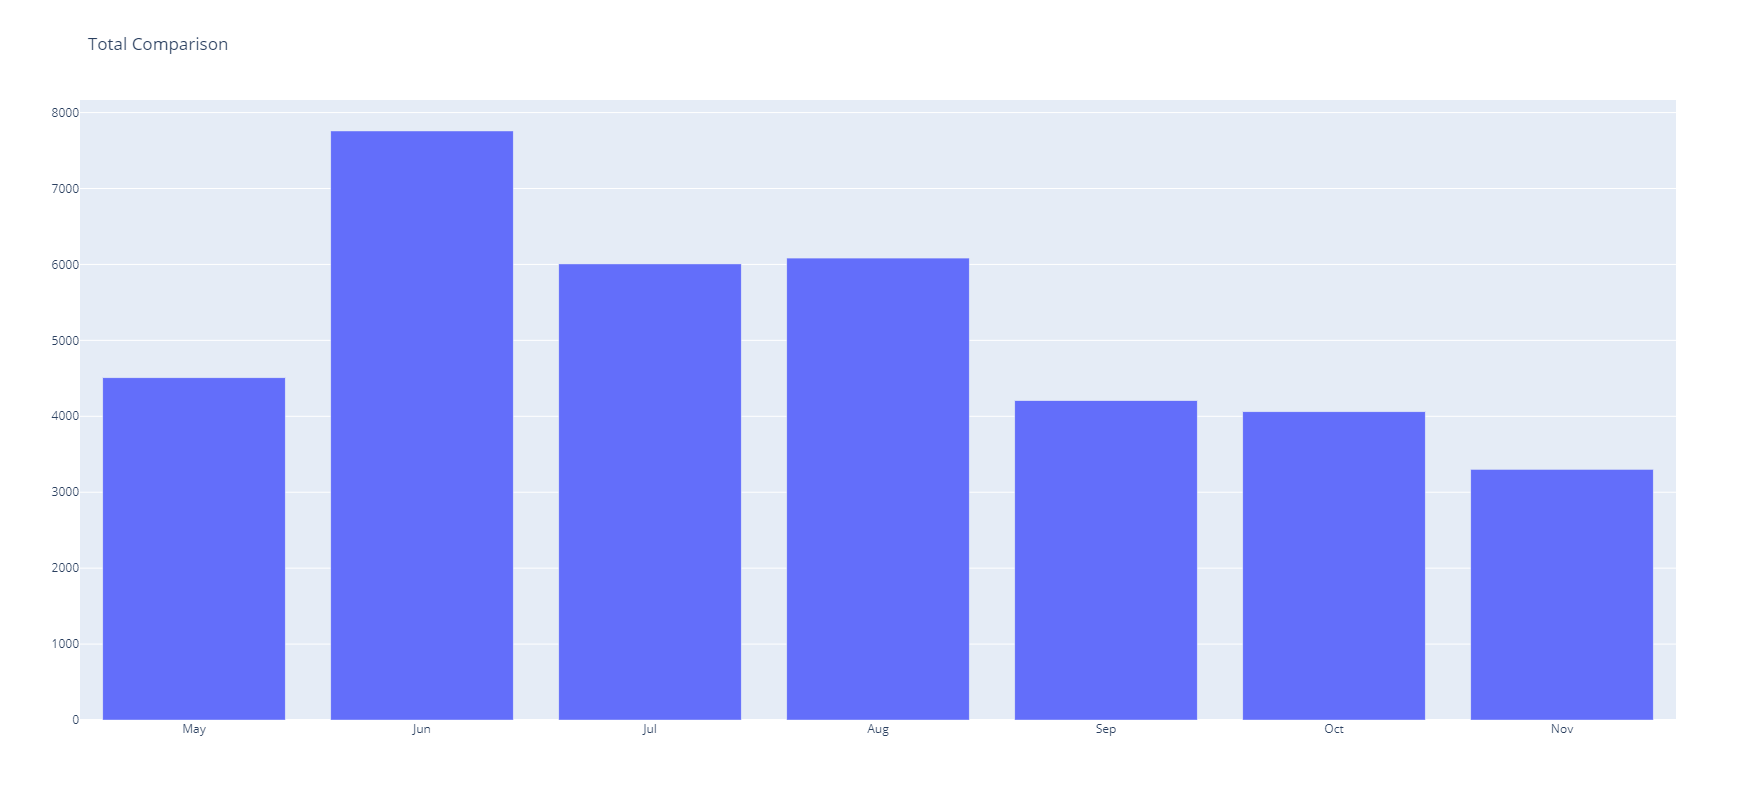

In [30]:
year = 2019

mask = (tdata['Date'].dt.year == year)
df = tdata[mask]
grouped = df.groupby(by=df['Date'].dt.month)['Amt'].sum()

labels = months[grouped.index]
values = grouped.values

fig, ax = px.subplots(1, 1)
ax[0][0].bar(values=values, labels=labels)
ax[0][0].set(title='Total Comparison')

fig.show()

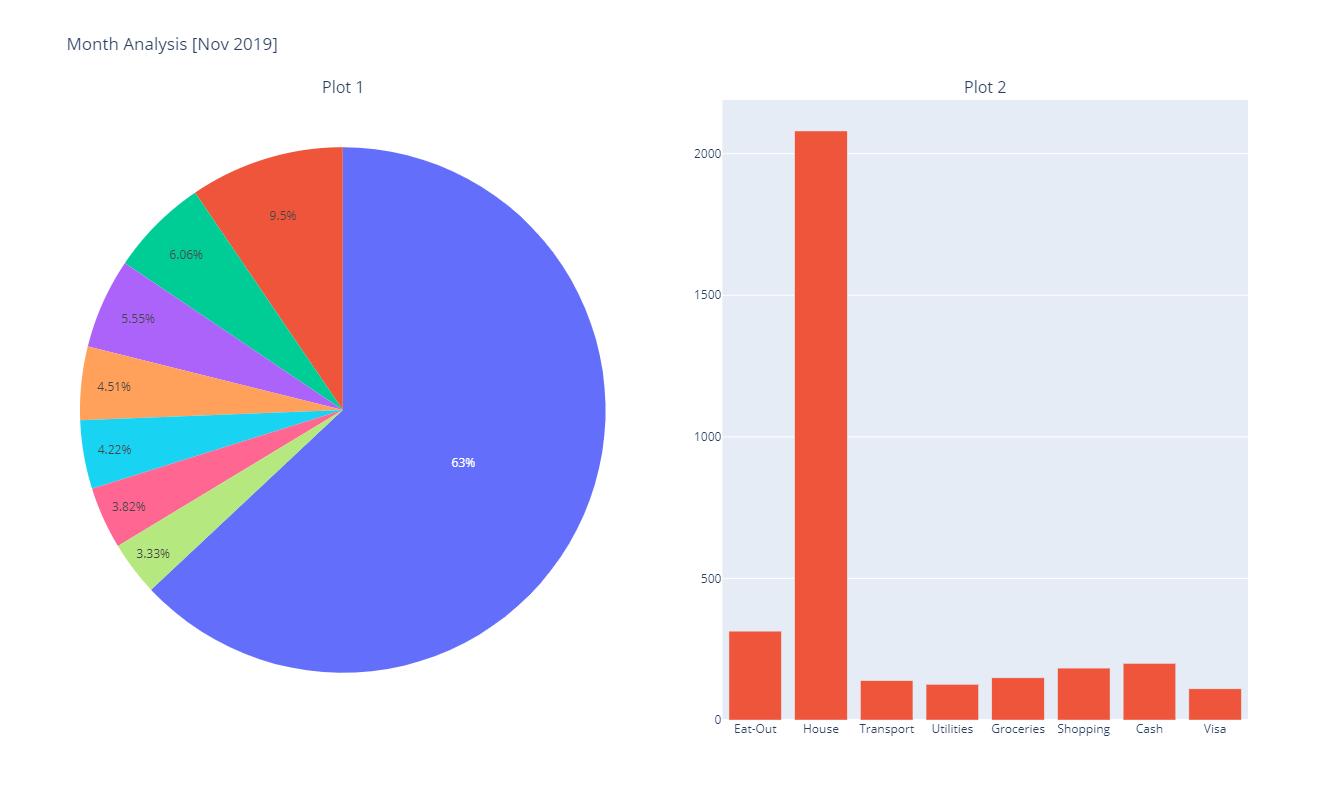

In [19]:
month = 11
year  = 2019
reload(px)

tmask = (tdata['Date'].dt.year  == year) & (tdata['Date'].dt.month == month)
bmask = (bdata['Month'].dt.year == year) & (bdata['Month'].dt.month == month)
df = tdata[tmask]
budget = bdata[bmask]['Budget']
budget.index = pd.CategoricalIndex(bdata[bmask]['Category'])

cats = df['Category'].unique().astype('str')
total = np.zeros(cats.shape)
for i in range(cats.shape[0]):
    total[i] = df[df['Category'] == cats[i]]['Amt'].sum()
    
fig, ax = px.subplots(1, 2, specs=[[{'type':'domain'}, {}]], subplot_titles=("Plot 1", "Plot 2"))
    
ax[0][0].pie(values=total, labels=cats)
ax[0][1].bar(values=total, labels=cats)
ax[0][0].set(title='Month Analysis [{} {}]'.format(months[month], year))

fig.show()